In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio as rio
from sklearn.metrics import auc
%matplotlib inline

In [2]:
HYDRO1 = glob.glob(r'../03. results/**/*hydinfo1.txt', recursive=True)
HYDRO2 = glob.glob(r'../03. results/**/*hydinfo2.txt', recursive=True)
HYDRO3 = glob.glob(r'../03. results/**/*hydinfo3.txt', recursive=True)
HYDRO3 = glob.glob(r'../03. results/**/*hydinfo4.txt', recursive=True)

print(len(HYDRO1))

for i in HYDRO1:
    print(i)

11
../03. results\11_results\11_files\11_hydinfo1.txt
../03. results\12_results\12_files\12_hydinfo1.txt
../03. results\13_results\13_files\13_hydinfo1.txt
../03. results\14_results\14_files\14_hydinfo1.txt
../03. results\21_results\21_files\21_hydinfo1.txt
../03. results\22_results\22_files\22_hydinfo1.txt
../03. results\23_results\23_files\23_hydinfo1.txt
../03. results\31_results\31_files\31_hydinfo1.txt
../03. results\32_results\32_files\32_hydinfo1.txt
../03. results\33_results\33_files\33_hydinfo1.txt
../03. results\41_results\41_files\41_hydinfo1.txt


# Linear regression for max. Flow Height (m)

In [11]:
columns = ['LS Name', 'Upper limit (m. AAL)', 'Lower limit (m. AAL)', 'Volume (10^6 m^3)', 
           'Max flow height at Q1 (m)', 'Peak discharge at Q1 (m^3/s)', 
           "Max displacement wave height (m)", "Volume of water flowed from lake within first 5 min (m^3)", 
           "Fraction of water flowed from lake within first 5 min. (%)"]

dfn = pd.DataFrame(columns=columns)

water_removed_vol = [89104.85, 191876.34, 612352.07, 814915.10, 27302.02, 177525.87, 288611.37, 10496.91, 46522.43, 92880.62, 15910.20] 
fraction_water_removed = [6.26, 13.49, 43.06, 57.30, 1.91, 12.48, 20.29, 0.73, 3.27, 6.53, 1.11]
displacement_wave = [35.5, 45.0, 68.9, 94.6, 26.1, 41.2, 49.5, 24.7, 26.5, 31.3, 25.9]
displacement_wave = [dw - 24.7 for dw in displacement_wave]

for i, (hydro, wv, fw, dw) in enumerate(zip(HYDRO1, water_removed_vol, fraction_water_removed, displacement_wave)):
    df = pd.read_csv(hydro, sep='\t')
    fh = df['H3'].max()
    qh = df['Q3'].max()
    
    if i==0:
        dfn = pd.concat([dfn, pd.DataFrame([["LS11",697,167,1,fh, qh, dw, wv, fw]], columns=dfn.columns)], ignore_index=True)
        
    if i==1:
        dfn = pd.concat([dfn, pd.DataFrame([["LS12",697,167,2,fh, qh, dw, wv, fw]], columns=dfn.columns)], ignore_index=True) 
        
    if i==2:
        dfn = pd.concat([dfn, pd.DataFrame([["LS13",697,167,10,fh, qh, dw, wv, fw]], columns=dfn.columns)], ignore_index=True) 
    
    if i==3:
        dfn = pd.concat([dfn, pd.DataFrame([["LS14",697,167,20,fh, qh, dw, wv, fw]], columns=dfn.columns)], ignore_index=True) 
        
    if i==4:
        dfn = pd.concat([dfn, pd.DataFrame([["LS21",697,436,0.1,fh, qh, dw, wv, fw]], columns=dfn.columns)], ignore_index=True) 
    
    if i==5:
        dfn = pd.concat([dfn, pd.DataFrame([["LS22",697,436,1,fh, qh, dw, wv, fw]], columns=dfn.columns)], ignore_index=True) 
        
    if i==6:
        dfn = pd.concat([dfn, pd.DataFrame([["LS23",697,436,2,fh, qh, dw, wv, fw]], columns=dfn.columns)], ignore_index=True) 
        
    if i==7:
        dfn = pd.concat([dfn, pd.DataFrame([["LS31",427,167,0.1,fh, qh, dw, wv, fw]], columns=dfn.columns)], ignore_index=True) 

    if i==8:
        dfn = pd.concat([dfn, pd.DataFrame([["LS32",427,167,1,fh, qh, dw, wv, fw]], columns=dfn.columns)], ignore_index=True)
     
    if i==9:
        dfn = pd.concat([dfn, pd.DataFrame([["LS33",427,167,2,fh, qh, dw, wv, fw]], columns=dfn.columns)], ignore_index=True)
        
    if i==10:
        dfn = pd.concat([dfn, pd.DataFrame([["LS41",76,6,0.03,fh, qh, dw, wv, fw]], columns=dfn.columns)], ignore_index=True)

dfn.index = dfn['LS Name']
dfn.drop(columns=['LS Name'], axis=1, inplace=True)
dfn

,Upper limit (m. AAL),Lower limit (m. AAL),Volume (10^6 m^3),Max flow height at Q1 (m),Peak discharge at Q1 (m^3/s),Max displacement wave height (m),Volume of water flowed from lake within first 5 min (m^3),Fraction of water flowed from lake within first 5 min. (%)
LS Name,,,,,,,,
LS11,697,167,1,1.97,1386.01,10.8,89104.85,6.26
LS12,697,167,2,4.28,5217.72,20.3,191876.34,13.49
LS13,697,167,10,9.67,22375.77,44.2,612352.07,43.06
LS14,697,167,20,12.22,38011.67,69.9,814915.10,57.30
LS21,697,436,0.1,0.86,363.29,1.4,27302.02,1.91
LS22,697,436,1,3.20,2440.34,16.5,177525.87,12.48
LS23,697,436,2,4.27,4020.07,24.8,288611.37,20.29
LS31,427,167,0.1,0.26,53.11,0.0,10496.91,0.73
LS32,427,167,1,1.61,1146.36,1.8,46522.43,3.27


In [13]:
dfn.to_csv("output/summary.csv")

[<matplotlib.lines.Line2D object at 0x0000029E623DCEB0>, <matplotlib.lines.Line2D object at 0x0000029E623D83A0>, <matplotlib.lines.Line2D object at 0x0000029E623D7BB0>, <matplotlib.lines.Line2D object at 0x0000029E623D7F10>]


C:\Users\tek.kshetri\AppData\Local\Temp\ipykernel_39016\2038275549.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s = s.astype(np.float)


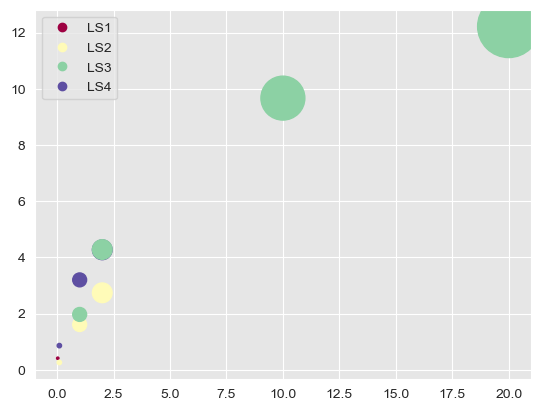

In [55]:
# df['LS VD']
s=dfn['Volume of LS (10^6 m^3)'] * 100
s = s.astype(np.float)
c = dfn['Upper Limit (m. a.l.l.)'] + dfn['Lower Limit (m. a.l.l.)']
c = c / 2
scatter = plt.scatter(dfn['Volume of LS (10^6 m^3)'], dfn['Max Flow Height at Q1 (m)'], s=s, c=c, cmap='Spectral')
plt.legend(handles=scatter.legend_elements()[0], labels=['LS1', "LS2", "LS3", "LS4"])
print(scatter.legend_elements()[0])

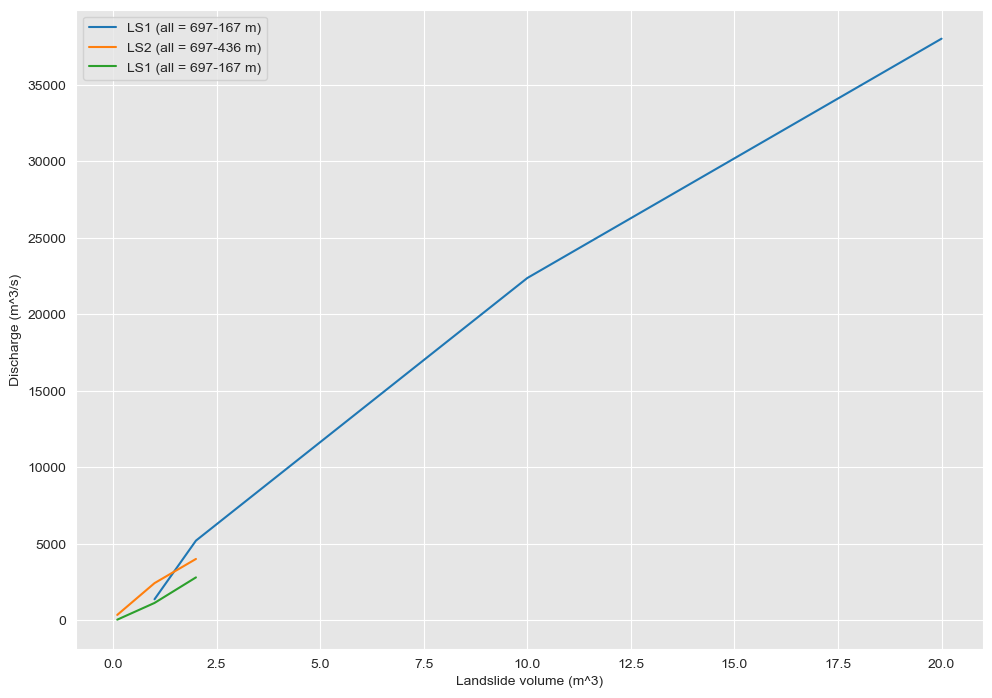

In [64]:
fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(11.7, 8.3)) # 
colors = sns.color_palette('pastel')
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})

ax.plot(dfn['Volume of LS (10^6 m^3)'].iloc[7:], dfn['Peak Discharge at Q1 (m^3/s)'].iloc[7:], label='LS1 (all = 697-167 m)')
ax.plot(dfn['Volume of LS (10^6 m^3)'].iloc[4:7], dfn['Peak Discharge at Q1 (m^3/s)'].iloc[4:7], label='LS2 (all = 697-436 m)')
ax.plot(dfn['Volume of LS (10^6 m^3)'].iloc[1:4], dfn['Peak Discharge at Q1 (m^3/s)'].iloc[1:4], label='LS1 (all = 697-167 m)')

ax.set_ylabel("Discharge (m^3/s)")
ax.set_xlabel("Landslide volume (m^3)")

ax.legend()

plt.savefig(r"output/ls_vol_vs_discharge.png",dpi=500)

### Coefficient of determination

The coefficient of determination (R²) is a number between 0 and 1 that measures how well a statistical model predicts an outcome

![cod](./img/cod.jpg)

In [21]:
from sklearn import linear_model

x = dfn.drop(['Max Flow Height (m)', 'Peak Discharge (m^3/s)', 'LS Name'], axis=1)
y = dfn['Max Flow Height (m)']

logr = linear_model.LinearRegression()
logr.fit(x,y)

y_pred = logr.predict(x)
for yt, yp in zip(y, y_pred):
    print(yt, "\t", yp)


0.41 	 -0.02085858540080593
2.74 	 2.3855494426947157
1.61 	 1.8491102766042697
0.26 	 1.3663150271228683
4.27 	 3.2092663707777285
3.2 	 2.6728272046872825
0.86 	 2.1900319552058813
12.22 	 13.262599778639755
9.67 	 7.898208117735296
4.28 	 3.606694789011728
1.97 	 3.070255622921282


In [22]:
a=logr.coef_
b=logr.intercept_ 
print("The Coefficient of determination: ", logr.score(x,y))
print(f"Regression Equation: y= {a[0]:.4f}x1 + {a[1]:.4f}x2 + {a[2]:.4f}x3 + {b:.4f}")

The Coefficient of determination:  0.9280540941256687
Regression Equation: y= 0.0045x1 + -0.0015x2 + 0.5364x3 + -0.3718


# Linear regression for Peak Discharge (m^3/s)

In [20]:
x = dfn.drop(['Max Flow Height (m)', 'Peak Discharge (m^3/s)', 'LS Name'], axis=1)
y = dfn['Peak Discharge (m^3/s)']
logr = linear_model.LinearRegression()
logr.fit(x,y)

y_pred = logr.predict(x)

a=logr.coef_
b=logr.intercept_ 
print("The Coefficient of determination: ", logr.score(x,y))
print(f"Regression Equation: y= {a[0]:.4f}x1 + {a[1]:.4f}x2 + {a[2]:.4f}x3 + {b:.4f}")

The Coefficient of determination:  0.9921176085320531
Regression Equation: y= 3.1454x1 + -2.5209x2 + 1914.2115x3 + -954.7075


# Other test

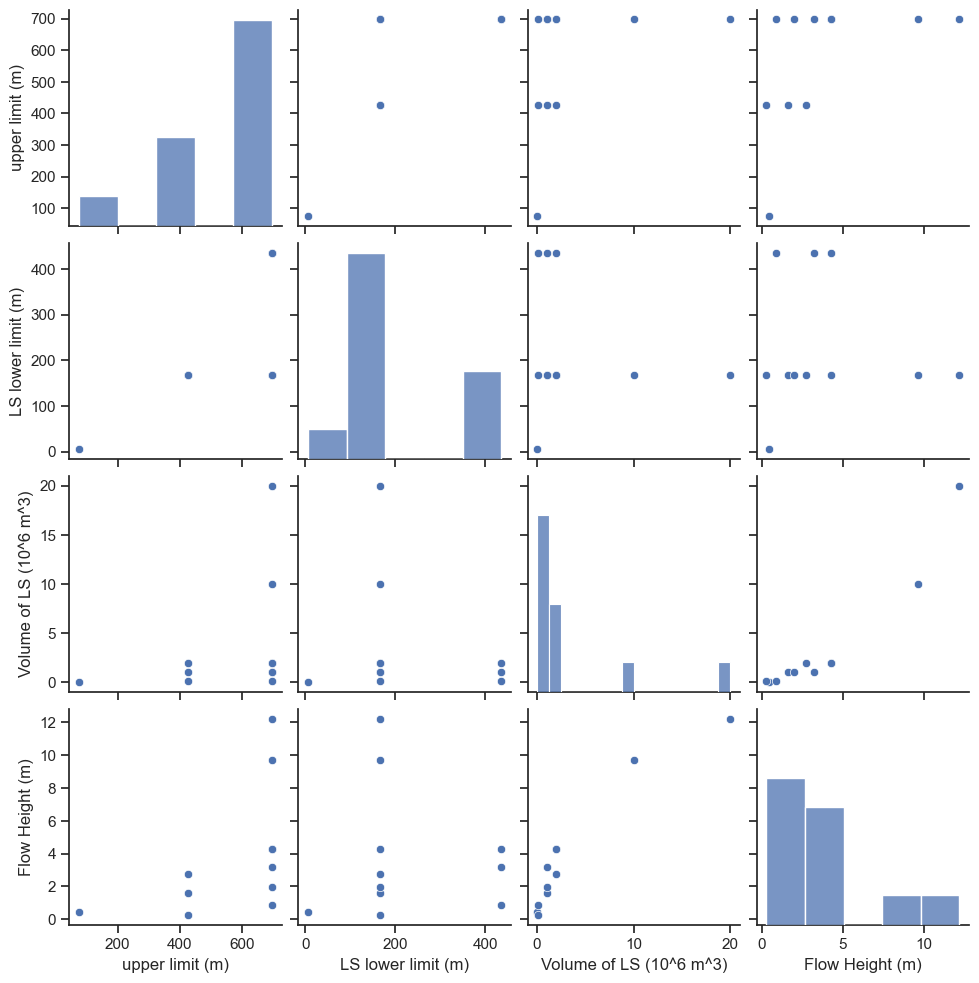

In [56]:
dfnf = dfn.drop(['Peak Discharge (m^3/s)', 'LS Name'], axis=1)
sns.pairplot(data=dfnf)